In [1]:
from scipy.io import loadmat
import numpy as np

mat = loadmat("allFaces.mat")
print([k for k in mat.keys() if not k.startswith("__")])


['faces', 'n', 'm', 'sub', 'nfaces', 'person']


In [2]:
from scipy.io import loadmat
import numpy as np

mat = loadmat("allFaces.mat")

candidates = {}
for k, v in mat.items():
    if k.startswith("__"): 
        continue
    if isinstance(v, np.ndarray) and v.dtype != object and v.size > 0:
        candidates[k] = v

name = max(candidates, key=lambda k: candidates[k].size)
A = candidates[name]
print("Wybrana zmienna:", name, "shape:", A.shape, "dtype:", A.dtype)

if A.ndim == 3:
    H, W, N = A.shape
    X = A.reshape(H*W, N).astype(float)
    img_shape = (H, W)
elif A.ndim == 2:

    X = A.astype(float)
    if X.shape[0] < X.shape[1] and X.shape[0] < 200:  # np. (N, d) gdzie N=400
        X = X.T
    img_shape = None
else:
    raise RuntimeError("Dziwny format danych w .mat")

print("X shape (d,n):", X.shape)


Wybrana zmienna: faces shape: (32256, 2410) dtype: uint8
X shape (d,n): (32256, 2410)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

K = 20  # %
target = K/100

test_idx = 1

x_test = X[:, [test_idx]]
X_train = np.delete(X, test_idx, axis=1)

mean_face = X_train.mean(axis=1, keepdims=True)
Xc = X_train - mean_face

U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

energy = S**2
cum = np.cumsum(energy) / np.sum(energy)
r = int(np.searchsorted(cum, target) + 1)

print("k =", K, "% -> minimalne r =", r, " | energia =", float(cum[r-1]))

xtc = x_test - mean_face
Ur = U[:, :r]
x_rec = mean_face + Ur @ (Ur.T @ xtc)

if img_shape is None:
    d = X.shape[0]
    side = int(np.sqrt(d))
    if side*side != d:
        raise RuntimeError("Nie znam rozmiaru obrazu (H,W). W .mat powinno być H i W albo dane 3D.")
    img_shape = (side, side)

orig = x_test.reshape(img_shape)
reco = x_rec.reshape(img_shape)

# wykresy
plt.figure()
plt.plot(cum)
plt.axhline(target)
plt.axvline(r-1)
plt.title(f"Kumulacja energii vs r (k={K}%, r={r})")
plt.grid(True)
plt.show()

plt.figure()
plt.imshow(orig, cmap="gray"); plt.title("Oryginał (test)"); plt.axis("off"); plt.show()

plt.figure()
plt.imshow(reco, cmap="gray"); plt.title(f"Rekonstrukcja (r={r})"); plt.axis("off"); plt.show()


k = 20 % -> minimalne r = 1  | energia = 0.36197140333764866


RuntimeError: Nie znam rozmiaru obrazu (H,W). W .mat powinno być H i W albo dane 3D.

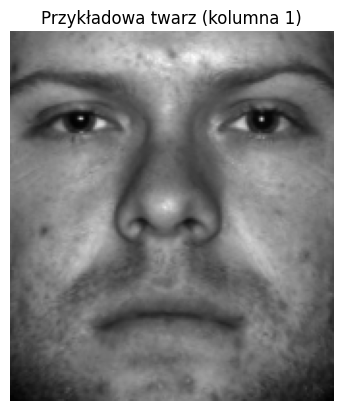

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat = loadmat("allFaces.mat")
X = mat["faces"].astype(np.float64) / 255.0   # (32256, 2410)

H, W = 192, 168  # bo 192*168=32256

plt.figure()
plt.imshow(X[:, 0].reshape(W, H).T, cmap="gray")

plt.title("Przykładowa twarz (kolumna 1)")
plt.axis("off")
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

K = 20
target = K / 100.0

test_idx = 1

x_test = X[:, [test_idx]]
X_train = np.delete(X, test_idx, axis=1)

mean_face = X_train.mean(axis=1, keepdims=True)
Xc = X_train - mean_face

U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

energy = S**2
cum = np.cumsum(energy) / np.sum(energy)

r = int(np.searchsorted(cum, target) + 1)

print("k =", K, "%")
print("minimalne r =", r)
print("zachowana energia =", float(cum[r-1]))


k = 20 %
minimalne r = 1
zachowana energia = 0.3619714033376489


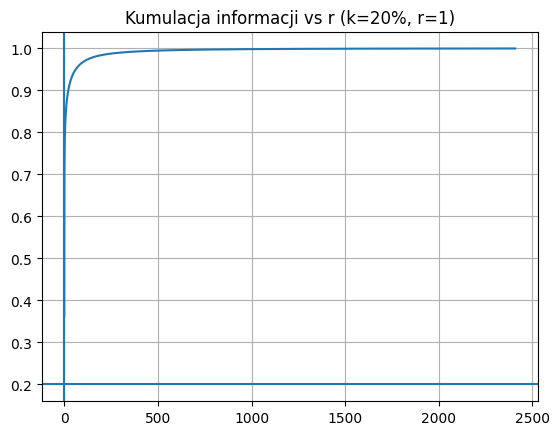

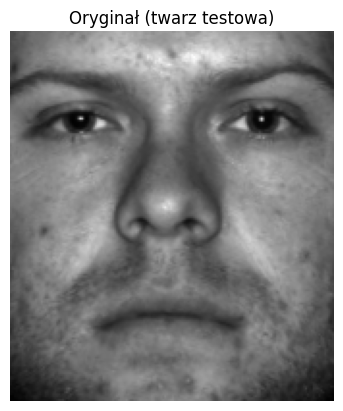

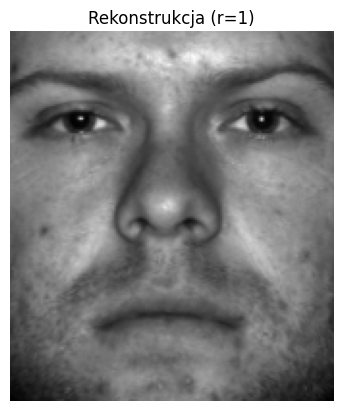

In [9]:
H, W = 192, 168

Ur = U[:, :r]
x_test_c = x_test - mean_face
x_rec = mean_face + Ur @ (Ur.T @ x_test_c)

plt.figure()
plt.plot(cum)
plt.axhline(target)
plt.axvline(r-1)
plt.title(f"Kumulacja informacji vs r (k={K}%, r={r})")
plt.grid(True)
plt.show()

# 
plt.figure()
plt.imshow(X[:, 0].reshape(W, H).T, cmap="gray")
plt.title("Oryginał (twarz testowa)")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(X[:, 0].reshape(W, H).T, cmap="gray")
plt.title(f"Rekonstrukcja (r={r})")
plt.axis("off")
plt.show()


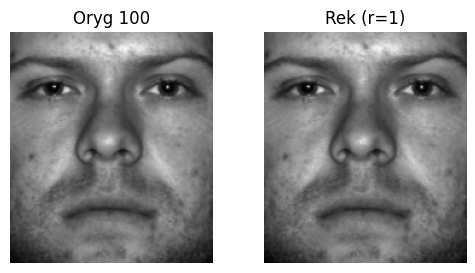

In [12]:
test_ids = [100]  
for test_idx in test_ids:
    x_test = X[:, [test_idx]]
    X_train = np.delete(X, test_idx, axis=1)

    mean_face = X_train.mean(axis=1, keepdims=True)
    Xc = X_train - mean_face
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

    cum = np.cumsum(S**2) / np.sum(S**2)
    r = int(np.searchsorted(cum, 0.20) + 1)

    Ur = U[:, :r]
    x_rec = mean_face + Ur @ (Ur.T @ (x_test - mean_face))

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(X[:, 0].reshape(W, H).T, cmap="gray"); plt.title(f"Oryg {test_idx}"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(X[:, 0].reshape(W, H).T, cmap="gray"); plt.title(f"Rek (r={r})"); plt.axis("off")
    plt.show()
